## Observations and Insights 

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].value_counts()

g989    13
c282    10
r604    10
o926    10
k403    10
        ..
h428     1
n482     1
d133     1
x336     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup = combined_df.loc[combined_df.duplicated(["Mouse ID","Timepoint"], keep=False),:]
dup_id = dup.at[908,"Mouse ID"]
dup_id

'g989'

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse = combined_df.loc[combined_df["Mouse ID"] == dup_id, :]
dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != dup_id, :]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

c282    10
r604    10
b742    10
o926    10
k403    10
        ..
h428     1
n482     1
d133     1
x336     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mean_df
median_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_df
var_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
var_df
std_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_df
sem_df = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_df

stats_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)": mean_df,
    "Median Tumor Volume (mm3)": median_df,
    "Variance Tumor Volume (mm3)": var_df,
    "Standard Deviation Tumor Volume (mm3)": std_df,
    "Standard Error of the Mean Tumor Volume (mm3)": sem_df,
})

stats_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error of the Mean Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [197]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



53.06065083009446

## Bar and Pie Charts

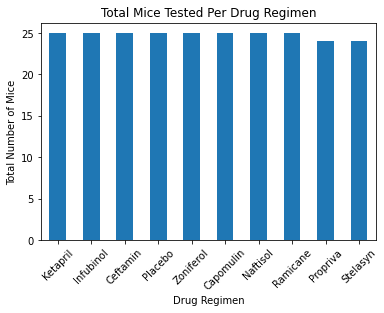

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total_drugs = clean_df[["Mouse ID","Drug Regimen"]].drop_duplicates()
mice_per_drug = total_drugs["Drug Regimen"].value_counts()
mice_per_drug.plot(kind="bar", rot=45)
plt.title("Total Mice Tested Per Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

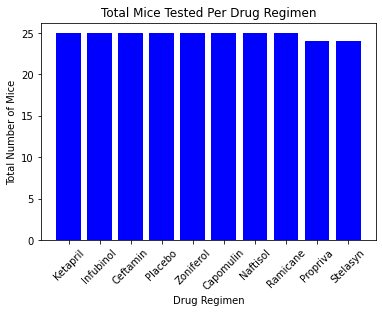

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs_list = list(mice_per_drug.index.values) 
mpd_values = mice_per_drug.tolist()
plt.bar(drugs_list, mpd_values, color="b", align="center")
plt.title("Total Mice Tested Per Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="45")
plt.show()

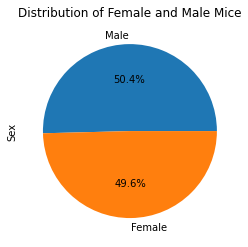

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_gross = clean_df[["Mouse ID", "Sex"]].drop_duplicates()
sex_net = sex_gross.Sex.value_counts()
sex_pie = sex_net.plot(kind="pie", y="Sex", title="Distribution of Female and Male Mice", autopct="%1.1f%%")

plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | 
                        (clean_df["Drug Regimen"] == "Infubinol") | (clean_df["Drug Regimen"] == "Ceftamin") , : ]

# Start by getting the last (greatest) timepoint for each mouse
drugs_max = drugs_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugs_merge = pd.merge(drugs_max, drugs_df, on=["Mouse ID", "Timepoint"], how="left")
drugs_merge.tail(20)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
80,v719,20,Infubinol,Female,17,30,54.048608,1
81,v766,15,Infubinol,Male,16,27,51.542431,1
82,v923,45,Capomulin,Female,19,21,40.658124,2
83,w150,10,Capomulin,Male,23,23,39.952347,0
84,w151,45,Ceftamin,Male,24,25,67.527482,3
85,w193,20,Infubinol,Male,22,30,50.005138,0
86,w584,30,Infubinol,Male,3,29,58.268442,1
87,w678,5,Ramicane,Female,5,24,43.166373,0
88,w914,45,Capomulin,Male,24,21,36.041047,2
89,x226,0,Ceftamin,Male,23,28,45.000000,0


In [120]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = drugs_merge["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# append tumor volume data to drug list treatment, code sourced on 26-12-2020 from website:
# https://thispointer.com/python-how-to-add-append-key-value-pairs-in-dictionary-using-dict-update/
def append_value(dict_obj, key, value):
    # Check if key exist in dict or not
    if key in dict_obj:
        # Key exist in dict.
        # Check if type of value of key is list or not
        if not isinstance(dict_obj[key], list):
            # If type is not list then make it list
            dict_obj[key] = [dict_obj[key]]
        # Append the value in list
        dict_obj[key].append(value)
    else:
        # As key is not in dict,
        # so, add key-value pair
        dict_obj[key] = value

for x in range(drugs_merge["Mouse ID"].count()):
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    if drugs_merge.iloc[x,2] == drugs_list[0]:
        append_value(tumor_vol, drugs_list[0], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[1]:
        append_value(tumor_vol, drugs_list[1], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[2]:
        append_value(tumor_vol, drugs_list[2], drugs_merge.iloc[x,6])
    if drugs_merge.iloc[x,2] == drugs_list[3]:
        append_value(tumor_vol, drugs_list[3], drugs_merge.iloc[x,6])

    # add subset 
    #quartiles = np.quantile(tumor_vol[drugs_list[3]],([.25,.5,.75]))

    
    # Determine outliers using upper and lower bounds
    
    
drugs_list

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
